# Task 4.2 Supervised Learning - Classification

/var/folders/b5/j4q36rqd1wl85_10xr8907j00000gn/T/ipykernel_18872/3157682388.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.decode() if isinstance(x, bytes) else x)


Accuracy: 0.7467532467532467
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



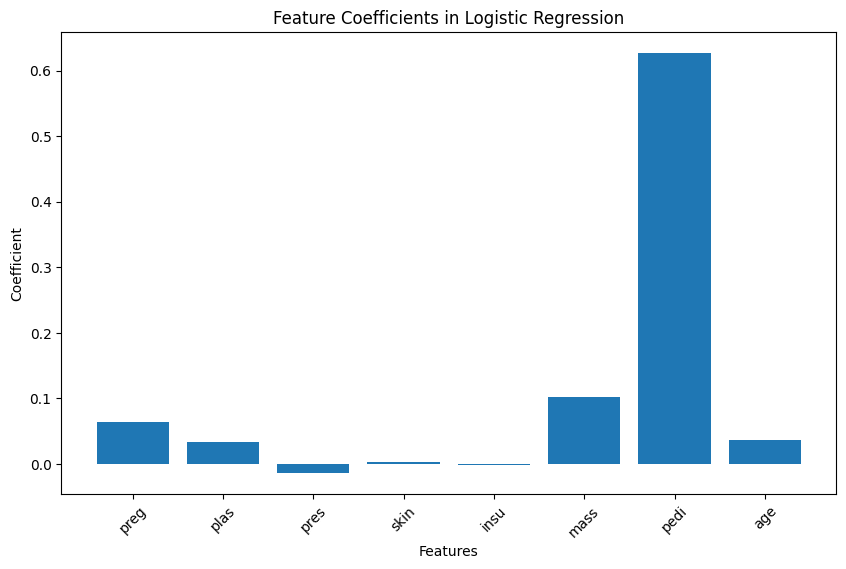

In [7]:

import pandas as pd
from scipy.io import arff
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Downloads/diabetes (2).arff'
data, meta = arff.loadarff(file_path)
df = pd.DataFrame(data)

# Convert byte strings to strings
df = df.applymap(lambda x: x.decode() if isinstance(x, bytes) else x)

# Define features and target
X = df.drop('class', axis=1).astype(float)
y = df['class'].astype('category').cat.codes  # Convert target to numerical codes

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model using scikit-learn's LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = lr.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plotting the model coefficients
plt.figure(figsize=(10, 6))
plt.bar(X.columns, lr.coef_[0])
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.title('Feature Coefficients in Logistic Regression')
plt.xticks(rotation=45)
plt.show()